In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv("data/HR_comma_sep.csv")

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


| Variable               | Description                                                        |
|------------------------|--------------------------------------------------------------------|
| satisfaction_level     | Employee-reported job satisfaction level [0–1]                    |
| last_evaluation        | Score of employee's last performance review [0–1]                 |
| number_project         | Number of projects employee contributes to                        |
| average_monthly_hours  | Average number of hours employee worked per month                 |
| time_spend_company     | How long the employee has been with the company (years)           |
| Work_accident          | Whether or not the employee experienced an accident while at work |
| left                   | Whether or not the employee left the company                      |
| promotion_last_5years  | Whether or not the employee was promoted in the last 5 years      |
| Department             | The employee's department                                         |
| salary                 | The employee's salary (U.S. dollars)                              |


## Initial Data Exploration and Data Cleaning

In [3]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Descriptive statistics of numerical data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Basic statistics of categorical data
df.describe(include='object')

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [6]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [7]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [8]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [9]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'sales': 'department'})

# Display all column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [10]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

3008

In [12]:
# Inspect some rows containing duplicates
df[df.duplicated(keep=False)].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
# Inspect rows that are identical to the first row
df[df.eq(df.iloc[0]).all(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low
14211,0.38,0.53,2,157,3,0,1,0,sales,low


In [14]:
# The likelihood of getting 10 columns the same based on each column's frequency
def row_likelihood(df, row):
    prob = 1.0
    for col in df.columns:
        val = row[col]
        freq = (df[col] == val).mean()
        if freq == 0:
            freq = 1e-9  # avoid zero-probability
        prob *= freq
    return prob

row = df.iloc[0]
likelihood = row_likelihood(df, row)
expected_occurrences = likelihood * len(df)
print(f"Estimated likelihood of row: {likelihood:.2e}")
print(f"Expected number of such rows: {expected_occurrences:.2f}")

Estimated likelihood of row: 4.20e-09
Expected number of such rows: 0.00


In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
df1.to_csv("data/clean_hr_data.csv", index=False)

1. Renaming columns: based on the business meanings of columns, some columns are renamed, such as "sales" looks like a typo and is renamed to "department"; some columns are renamed to match the "snake_case".
2. Checking missing values: no missing values and all columns have 14,999 records.
3. Checking abnormal values: based on the understanding of business meanings of each column check the column values, for example, `satisfaction_level` and `last_evaluation` should only contain values between 0 and 1. No abnormal values.
4. Removing duplicates: there are 3008 duplicated rows which is 20% of the data. Based on likelihood analysis, it is very unlikely that these duplicated observations are legitimate. So, these rows are dropped.

## Attrition Rate Analysis

In [17]:
total = len(df1)
stayed = df1['left'].value_counts().get(0, 0)
left = df1['left'].value_counts().get(1, 0)
turnover_rate = left / total * 100

print(f"Employee Turnover Summary")
print(f"---------------------------")
print(f"Total number of employees: {total:,}")
print(f"Stayed employees:          {stayed:,}")
print(f"Left employees:            {left:,}")
print(f"Turnover rate:             {turnover_rate:.2f}%")

Employee Turnover Summary
---------------------------
Total number of employees: 11,991
Stayed employees:          10,000
Left employees:            1,991
Turnover rate:             16.60%


Through the statistics of the data set, it is found that 1,991 employees have been lost in history, with an average turnover rate of 16.60%.

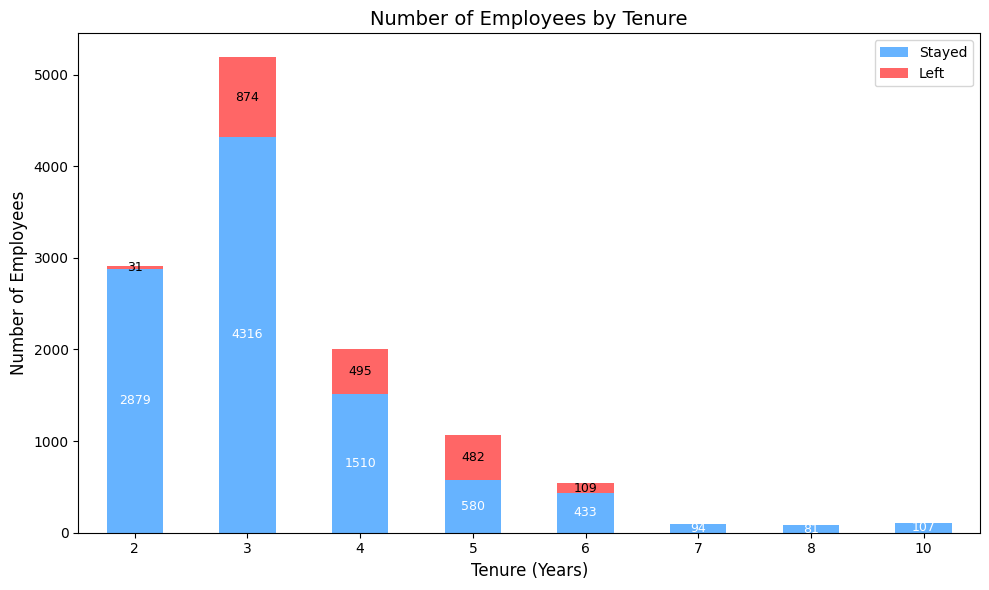

In [18]:
# Number of stayed/left employees in each tenure group
tenure_counts = df1.groupby(['tenure', 'left']).size().unstack(fill_value=0)
tenure_counts = tenure_counts.sort_index()

# Draw stacked bar chart
ax = tenure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff', '#ff6666'])
plt.title('Number of Employees by Tenure', fontsize=14)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(['Stayed', 'Left'])
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels
for i, (index, row) in enumerate(tenure_counts.iterrows()):
    stayed = row.get(0, 0)
    left = row.get(1, 0)

    # stayed label
    if stayed > 0:
        ax.text(i, stayed / 2, str(stayed), ha='center', va='center', fontsize=9, color='white')

    # left label
    if left > 0:
        ax.text(i, stayed + left / 2, str(left), ha='center', va='center', fontsize=9, color='black')

plt.show()

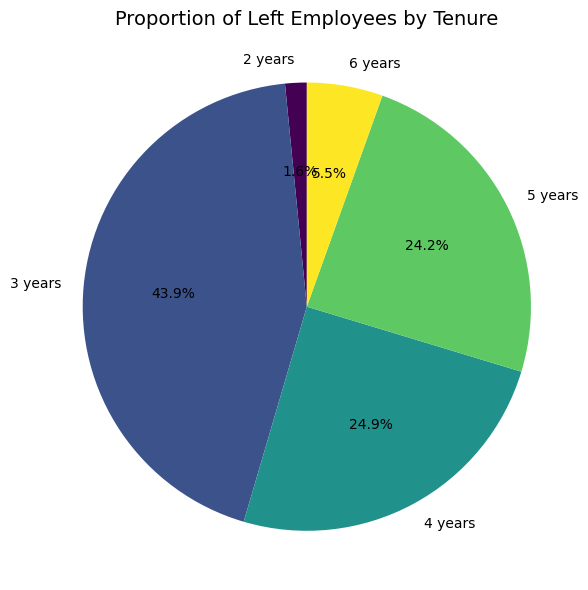

In [19]:
left_df = df1[df1['left'] == 1]

# Compute left employees for each tenure
tenure_left_counts = left_df['tenure'].value_counts().sort_index()
tenure_labels = [f'{int(x)} years' for x in tenure_left_counts.index]

# Colormap
cmap = colormaps['viridis']
colors = cmap(np.linspace(0, 1, len(tenure_left_counts)))

# Draw pie chart
plt.figure(figsize=(6,6))
plt.pie(
    tenure_left_counts,
    labels=tenure_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Proportion of Left Employees by Tenure', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Analysis by Tenure
From the above two charts we could get the following insights:
1. Analyzing the tenure of employees who left reveals that those with 3 to 5 years of service had the highest attrition counts, with 3-year-tenure employees being the most affected (874 individuals). Employees with more than 6 years of tenure showed minimal attrition, indicating relative stability.

2. Among all employees who left the company, those with 3 years of tenure accounted for 43.9%, 4-year-tenure employees for 24.9%, 5-year-tenure employees for 24.2%, and 6-year-tenure employees for 6.5%.

To further analyze the relation between tenure and employee status, we can perform a hypothesis test.

$ H_0 $: There is no significant difference in attrition rate among different tenure groups\
$ H_A $: There is a significant difference in attrition rate among different tenure groups

In [20]:
# Create contingency table
contingency_table = pd.crosstab(df1['tenure'], df1['left'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

# Conclusion
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-squared statistic: 1298.5556
p-value: 0.0000
Reject the null hypothesis.


The result of this hypothesis test align with the graph insights. Under different tenure groups, the attrition rate has a significant difference, that is, the tenure of employees affect attrition rate.

### Further exploration on the 3-to-5-year tenure group

In [21]:
# Statistics for the 3-to-5-year tenure group
df1.loc[:, 'tenure_group'] = df1['tenure'].apply(lambda x: '3-5 years' if x in [3, 4, 5] else 'Others')

# grouped = df1.groupby(['tenure_group', 'left'])[
#     ['satisfaction_level', 'last_evaluation', 'number_project',
#      'average_monthly_hours', 'work_accident', 'promotion_last_5years']
# ].mean().round(3)

# grouped_df = grouped.reset_index()
# grouped_df['left'] = grouped_df['left'].map({0: 'stayed', 1: 'left'})

# grouped_df

/var/folders/d5/l8j1z85n6r381n7xq69lddph0000gn/T/ipykernel_30987/101105912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'tenure_group'] = df1['tenure'].apply(lambda x: '3-5 years' if x in [3, 4, 5] else 'Others')


In [22]:
grouped_continuous = df1.groupby(['tenure_group', 'left'])[
    ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours']
].mean().round(3).reset_index()

# 替换 left 编码为文字
grouped_continuous['left'] = grouped_continuous['left'].map({0: 'stayed', 1: 'left'})

grouped_continuous

,tenure_group,left,satisfaction_level,last_evaluation,number_project,average_monthly_hours
0,3-5 years,stayed,0.663,0.717,3.817,198.542
1,3-5 years,left,0.418,0.710,3.840,206.152
2,Others,stayed,0.675,0.714,3.734,199.657
3,Others,left,0.741,0.874,4.464,234.736


In [23]:
# 只保留二元变量
binary_vars = ['work_accident', 'promotion_last_5years']

# 计算二元变量的“发生比例”
grouped_binary = df1.groupby(['tenure_group', 'left'])[binary_vars].mean().round(4) * 100
grouped_binary = grouped_binary.reset_index()

# 替换 left 标签
grouped_binary['left'] = grouped_binary['left'].map({0: 'stayed', 1: 'left'})

# 格式化为百分比字符串
for col in binary_vars:
    grouped_binary[col] = grouped_binary[col].map(lambda x: f'{x:.1f}%')

grouped_binary

,tenure_group,left,work_accident,promotion_last_5years
0,3-5 years,stayed,17.2%,1.8%
1,3-5 years,left,5.4%,0.4%
2,Others,stayed,17.9%,2.2%
3,Others,left,3.6%,0.0%


* 在 3–5 年司龄且仍在职的员工中，有 17.2% 曾发生过工伤，1.8% 曾在过去五年获得晋升。
* 在 3–5 年司龄但已离职的员工中，只有 5.4% 曾发生过工伤，仅 0.4% 曾获得晋升。
* 在其他司龄（非 3–5 年）且仍在职的员工中，17.9% 发生过工伤，2.2% 有过晋升。
* 在其他司龄中已离职的员工里，仅 3.6% 曾发生过工伤，0% 曾晋升。

* 工伤发生率：在职员工普遍高于离职员工，尤其是 3–5 年组（17.2% vs 5.4%）。
* 晋升率：在职员工显著高于离职员工，晋升机会与员工留任存在关联。
* 在所有离职员工中，晋升比例极低（尤其是其他年限，晋升为 0%）。

In [24]:
# Salary summary for the 3-to-5-year tenure group
salary_order = ['low', 'medium', 'high']

total_35 = df1[df1['tenure_group'] == '3-5 years'].shape[0]
left_35 = df1[(df1['tenure_group'] == '3-5 years') & (df1['left'] == 1)]
stayed_35 = df1[(df1['tenure_group'] == '3-5 years') & (df1['left'] == 0)]

left_salary_counts = left_35['salary'].value_counts().reindex(salary_order, fill_value=0)
stayed_salary_counts = stayed_35['salary'].value_counts().reindex(salary_order, fill_value=0)

left_salary_proportion = (left_salary_counts / total_35 * 100).round(1)
stayed_salary_proportion = (stayed_salary_counts / total_35 * 100).round(1)

summary_salary = pd.DataFrame({
    'Salary Level': salary_order,
    'Left Count': left_salary_counts.values,
    'Left %': [f'{v:.1f}%' for v in left_salary_proportion.values],
    'Stayed Count': stayed_salary_counts.values,
    'Stayed %': [f'{v:.1f}%' for v in stayed_salary_proportion.values]
})
summary_salary

,Salary Level,Left Count,Left %,Stayed Count,Stayed %
0,low,1095,13.3%,2960,35.8%
1,medium,708,8.6%,2868,34.7%
2,high,48,0.6%,578,7.0%


For employees with 3–5 years of tenure:
* The average job satisfaction of those who left is significantly lower than that of those who stayed.
* Their performance evaluations are slightly lower than those of retained employees.
* Employees who left completed slightly more projects and had slightly higher average monthly working hours.
* For different tenure groups, the incidence of work accidents is similar.
* Their promotion rate is significantly lower than that of retained employees.
* Most of the employees who left fall into the low and medium salary levels, with very few in the high salary group.

In [25]:
# 只取 3–5 年 tenure 员工
df_35 = df1[df1['tenure_group'] == '3-5 years']

# 分为离职和在职两组
left = df_35[df_35['left'] == 1]
stayed = df_35[df_35['left'] == 0]

In [26]:
# t test for continuous variables
def compare_means(var):
    t_stat, p_val = ttest_ind(left[var], stayed[var], equal_var=False)
    print(f'{var} - p-value: {p_val:.4f} | {"Significant" if p_val < 0.05 else "Not significant"}')

for col in ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours']:
    compare_means(col)

satisfaction_level - p-value: 0.0000 | Significant
last_evaluation - p-value: 0.2049 | Not significant
number_project - p-value: 0.6100 | Not significant
average_monthly_hours - p-value: 0.0000 | Significant


In [27]:
# z test for binomial variable
def z_test_prop(var):
    count = [left[var].sum(), stayed[var].sum()]
    nobs = [len(left), len(stayed)]
    stat, p_val = proportions_ztest(count, nobs)
    print(f'{var} - p-value: {p_val:.4f} | {"Significant" if p_val < 0.05 else "Not significant"}')

for col in ['work_accident', 'promotion_last_5years']:
    z_test_prop(col)

work_accident - p-value: 0.0000 | Significant
promotion_last_5years - p-value: 0.0000 | Significant


In [28]:
# 构建 salary vs left 的列联表（仅 3–5 年员工）
salary_table = pd.crosstab(df_35['salary'], df_35['left'])

chi2, p_val, dof, expected = chi2_contingency(salary_table)
print(f'Salary vs Left - p-value: {p_val:.4f} | {"Significant" if p_val < 0.05 else "Not significant"}')

Salary vs Left - p-value: 0.0000 | Significant


The difference in average job satisfaction between the two groups is statistically significant (p < 0.001), indicating that lower satisfaction is associated with attrition.

Promotion rate also shows a significant difference (p < 0.001), supporting the observation that lack of promotion contributes to turnover.

No significant difference was found in work accident rates (p = 0.12), suggesting this may not be a strong factor in attrition.

In [29]:
import statsmodels.api as sm

features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_monthly_hours', 'work_accident', 'promotion_last_5years']
X = df1[features]
X = sm.add_constant(X)
y = df1['left']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.375525
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                11991
Model:                          Logit   Df Residuals:                    11984
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.1647
Time:                        00:40:13   Log-Likelihood:                -4502.9
converged:                       True   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3371      0.149      2.267      0.023       0.046       0.